In [18]:
import pandas as pd
import numpy as np
import torch as t
import plotly.graph_objects as go
import seaborn as sns

In [5]:
# load in clean dataset
clean_data = pd.read_csv(r"/home/tobi/Desktop/Capstone/EnergyDemandForecasting/src/Saved/Datasets/clean_training.csv", index_col=0)
clean_data.index = pd.to_datetime(clean_data.index)
display(clean_data)

,Energy Demand (MWH),HourlyDryBulbTemperature,HourlyDewPointTemperature,HourlyStationPressure,HourlyPrecipitation,HourlyWindSpeed,Energy Price (cents/KWH),Labor Force Level,Civilian Noninstitutional Population,Labor Force Participation
2018-06-19 05:00:00,7221.0,78.0,72.0,29.62,NaN,6.000000,19.28,4272100.0,7105823.0,60.1
2018-06-19 06:00:00,6911.0,79.0,70.0,29.63,NaN,6.000000,19.28,4272100.0,7105823.0,60.1
2018-06-19 07:00:00,6691.0,81.0,69.0,29.63,NaN,3.544254,19.28,4272100.0,7105823.0,60.1
2018-06-19 08:00:00,6582.0,82.0,67.0,29.63,NaN,3.789006,19.28,4272100.0,7105823.0,60.1
2018-06-19 09:00:00,6600.0,81.0,69.0,29.65,NaN,7.000000,19.28,4272100.0,7105823.0,60.1
...,...,...,...,...,...,...,...,...,...,...
2023-08-05 14:00:00,6168.0,84.0,58.0,29.81,NaN,6.000000,22.33,4165918.0,6747734.0,61.7
2023-08-05 15:00:00,6431.0,83.0,60.0,29.82,NaN,7.000000,22.33,4165918.0,6747734.0,61.7
2023-08-05 16:00:00,6599.0,82.0,55.0,29.82,NaN,0.000000,22.33,4165918.0,6747734.0,61.7
2023-08-05 17:00:00,6745.0,81.0,56.0,29.82,NaN,5.000000,22.33,4165918.0,6747734.0,61.7


Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
      dtype='int32', length=44966)

<Axes: ylabel='Count'>

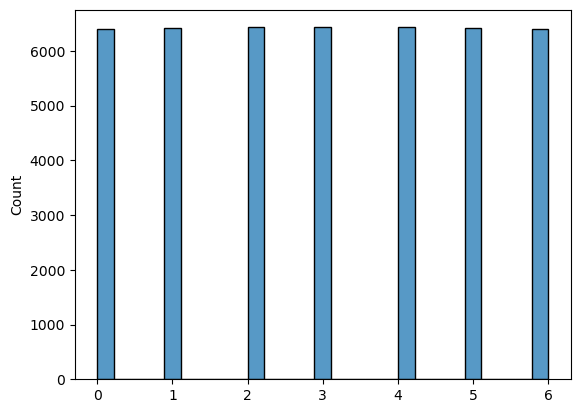

In [19]:
# test = np.range(0, clean_data)clean_data.index
test = clean_data.index.dayofweek
display(test)
sns.histplot(test)

In [20]:
# encode hour of the day, day of the week, and day of the year in terms of sine and cosine
clean_data.loc[:,"Hour of Day"] = clean_data.index.hour
clean_data.loc[:,"Day of Week"] = clean_data.index.dayofweek
clean_data.loc[:,"Day of Year"] = clean_data.index.dayofyear
display(clean_data)

# should also try doing this without sine and cosine and compare the difference

,Energy Demand (MWH),HourlyDryBulbTemperature,HourlyDewPointTemperature,HourlyStationPressure,HourlyPrecipitation,HourlyWindSpeed,Energy Price (cents/KWH),Labor Force Level,Civilian Noninstitutional Population,Labor Force Participation,Hour of Day,Day of Week,Day of Year
2018-06-19 05:00:00,7221.0,78.0,72.0,29.62,NaN,6.000000,19.28,4272100.0,7105823.0,60.1,5,1,170
2018-06-19 06:00:00,6911.0,79.0,70.0,29.63,NaN,6.000000,19.28,4272100.0,7105823.0,60.1,6,1,170
2018-06-19 07:00:00,6691.0,81.0,69.0,29.63,NaN,3.544254,19.28,4272100.0,7105823.0,60.1,7,1,170
2018-06-19 08:00:00,6582.0,82.0,67.0,29.63,NaN,3.789006,19.28,4272100.0,7105823.0,60.1,8,1,170
2018-06-19 09:00:00,6600.0,81.0,69.0,29.65,NaN,7.000000,19.28,4272100.0,7105823.0,60.1,9,1,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-05 14:00:00,6168.0,84.0,58.0,29.81,NaN,6.000000,22.33,4165918.0,6747734.0,61.7,14,5,217
2023-08-05 15:00:00,6431.0,83.0,60.0,29.82,NaN,7.000000,22.33,4165918.0,6747734.0,61.7,15,5,217
2023-08-05 16:00:00,6599.0,82.0,55.0,29.82,NaN,0.000000,22.33,4165918.0,6747734.0,61.7,16,5,217
2023-08-05 17:00:00,6745.0,81.0,56.0,29.82,NaN,5.000000,22.33,4165918.0,6747734.0,61.7,17,5,217


In [21]:
if t.cuda.is_available():
    device = t.device("cuda")
    print("PyTorch is using:", t.cuda.get_device_name(0))
else:
    print("PyTorch is using CPU")

PyTorch is using: Radeon RX 7900 XTX


Encode Categorical Variables

In [50]:
clean_data = pd.get_dummies(clean_data, drop_first=True).astype("float32")

Normalize features into [0,1]

In [52]:
min_vals = np.min(clean_data, axis=0)
max_vals = np.max(clean_data, axis=0)

# Normalize each column to be in the range [0, 1]
clean_data = (clean_data - min_vals) / (max_vals - min_vals)

In [4]:
# test using gpu
test = t.randn(32, 5, device="cuda")
display(test.device)

device(type='cuda', index=0)

In [53]:
display(clean_data.dtypes)

Energy Demand (MWH)                     float32
HourlyDryBulbTemperature                float32
HourlyDewPointTemperature               float32
HourlyStationPressure                   float32
HourlyWindSpeed                         float32
Energy Price (cents/KWH)                float32
Labor Force Level                       float32
Civilian Noninstitutional Population    float32
Labor Force Participation               float32
Hour of Day                             float32
Day of Week                             float32
Day of Year                             float32
HourlyPrecipitation_Light Rain          float32
HourlyPrecipitation_Medium Rain         float32
dtype: object

In [54]:
def format_data_lstm(clean_data:pd.DataFrame, sequence_length:int, batch_size:int):
    pass

batch_size = 1
sequence_length = 10

# formatted dataset: (N x B x S x K)
B = 32   # Batch size
S = 24   # Sequence length
K = clean_data.shape[1]  # Number of features

# Reshape data to have dimensions (N x B x S x K)
data = clean_data.values
# reshaped_data = np.tile(data, (N,B,S,K)) #.reshape(N, B, S, K)

# Calculate the number of sequences of length S that can be produced
num_sequences = data.shape[0] - S + 1

# Initialize an empty list to store the groups
groups = []

# Iterate over the array to create groups
for i in range(num_sequences):
    group = data[i:i+S]
    groups.append(group)

# Convert the list of groups to a NumPy array
formatted_data = np.array(groups)
formatted_data = formatted_data[(formatted_data.shape[0]%B):]
formatted_data = np.array(np.split(formatted_data, formatted_data.shape[0]//B, axis=0))

# display(data.shape)
display(formatted_data.shape)
# print(formatted_data)

(1404, 32, 24, 14)

In [57]:
import numpy as np

class LSTM(t.nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = t.nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = t.nn.Linear(hidden_size, output_size)
        self.c0 = None
        self.h0 = None

    def forward(self, x, save_cell_state:bool=False):
        if save_cell_state: # Use previous hidden state and cell state
            if self.c0 is None: # no previous states so need to initialize them
                self.h0 = t.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
                self.c0 = t.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
            h0 = self.c0
            c0 = self.h0
        else: # Initialize hidden state and cell state
            h0 = t.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
            c0 = t.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Forward propagate LSTM
        out, (h0, c0) = self.lstm(x, (h0, c0))

        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

# Example usage:
input_size = K  # Number of features in the input
hidden_size = 32  # Number of LSTM units (hidden size)
num_layers = 1  # Number of LSTM layers
output_size = K-3  # Number of output predictions
seq_length = S  # Length of input sequence (assuming hourly data)

# Initialize the LSTM model
model = LSTM(input_size, hidden_size, num_layers, output_size) 

# Example input tensor (batch_size, seq_length, input_size)
input_tensor = t.randn(32, seq_length, input_size)
input_tensor = t.tensor(formatted_data[0], device="cpu")


# Forward pass
output = model(input_tensor)
print("Output shape:", output.shape)


Output shape: torch.Size([32, 11])
